In [ ]:
#importaciones
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#ensayo
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([0.5, 0.5])

In [ ]:
#importa dataframe
df = pd.read_csv('Baloto.csv')
df.columns = ['fecha', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6']
df.head()

,fecha,b1,b2,b3,b4,b5,b6
0,30.09.2023,10,15,19,21,41,10
1,27.09.2023,2,20,25,36,41,11
2,23.09.2023,13,20,24,30,42,12
3,20.09.2023,2,3,10,21,23,14
4,16.09.2023,6,29,32,39,43,16


In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fecha   2333 non-null   object
 1   b1      2333 non-null   int64 
 2   b2      2333 non-null   int64 
 3   b3      2333 non-null   int64 
 4   b4      2333 non-null   int64 
 5   b5      2333 non-null   int64 
 6   b6      2333 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 127.7+ KB


In [ ]:
#nulls
df.isnull().sum()

fecha    0
b1       0
b2       0
b3       0
b4       0
b5       0
b6       0
dtype: int64

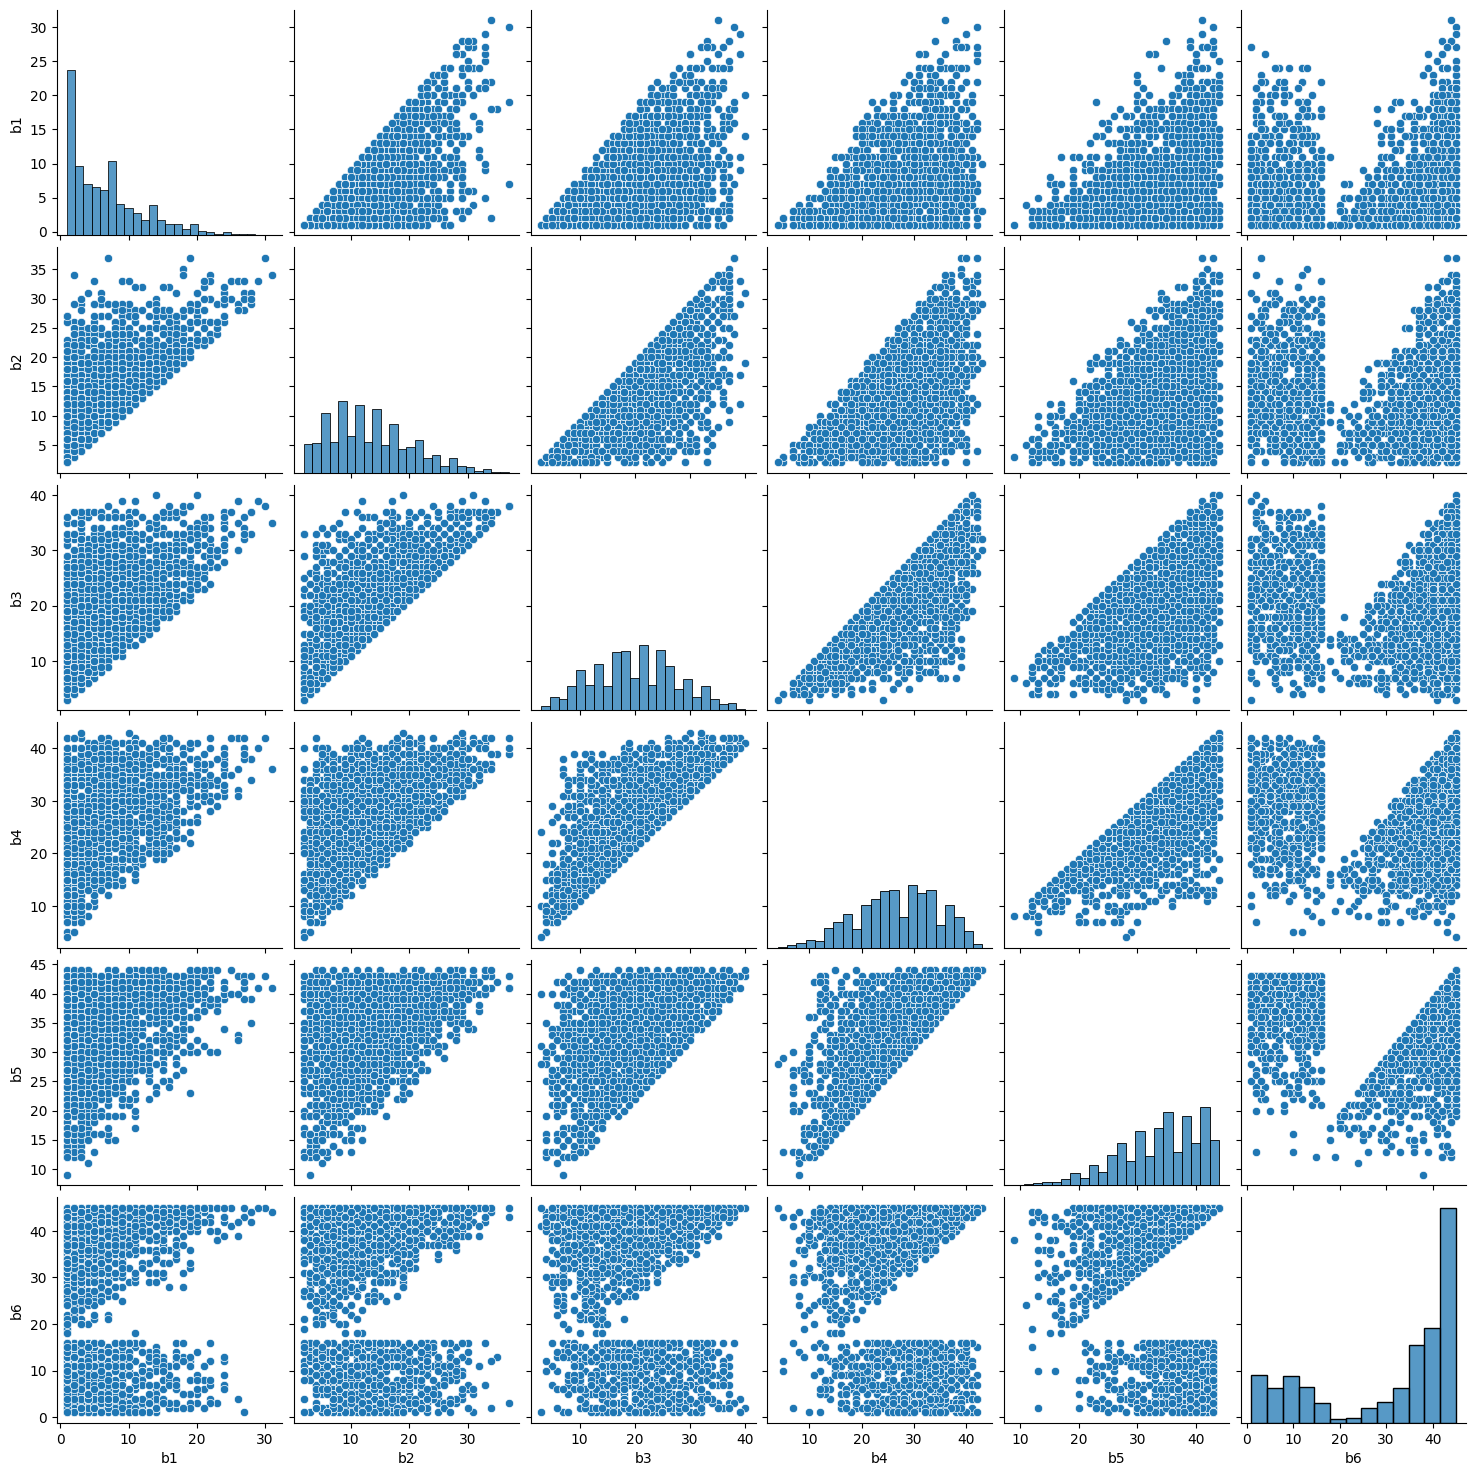

In [7]:
sns.pairplot(df) # Call pairplot from seaborn library


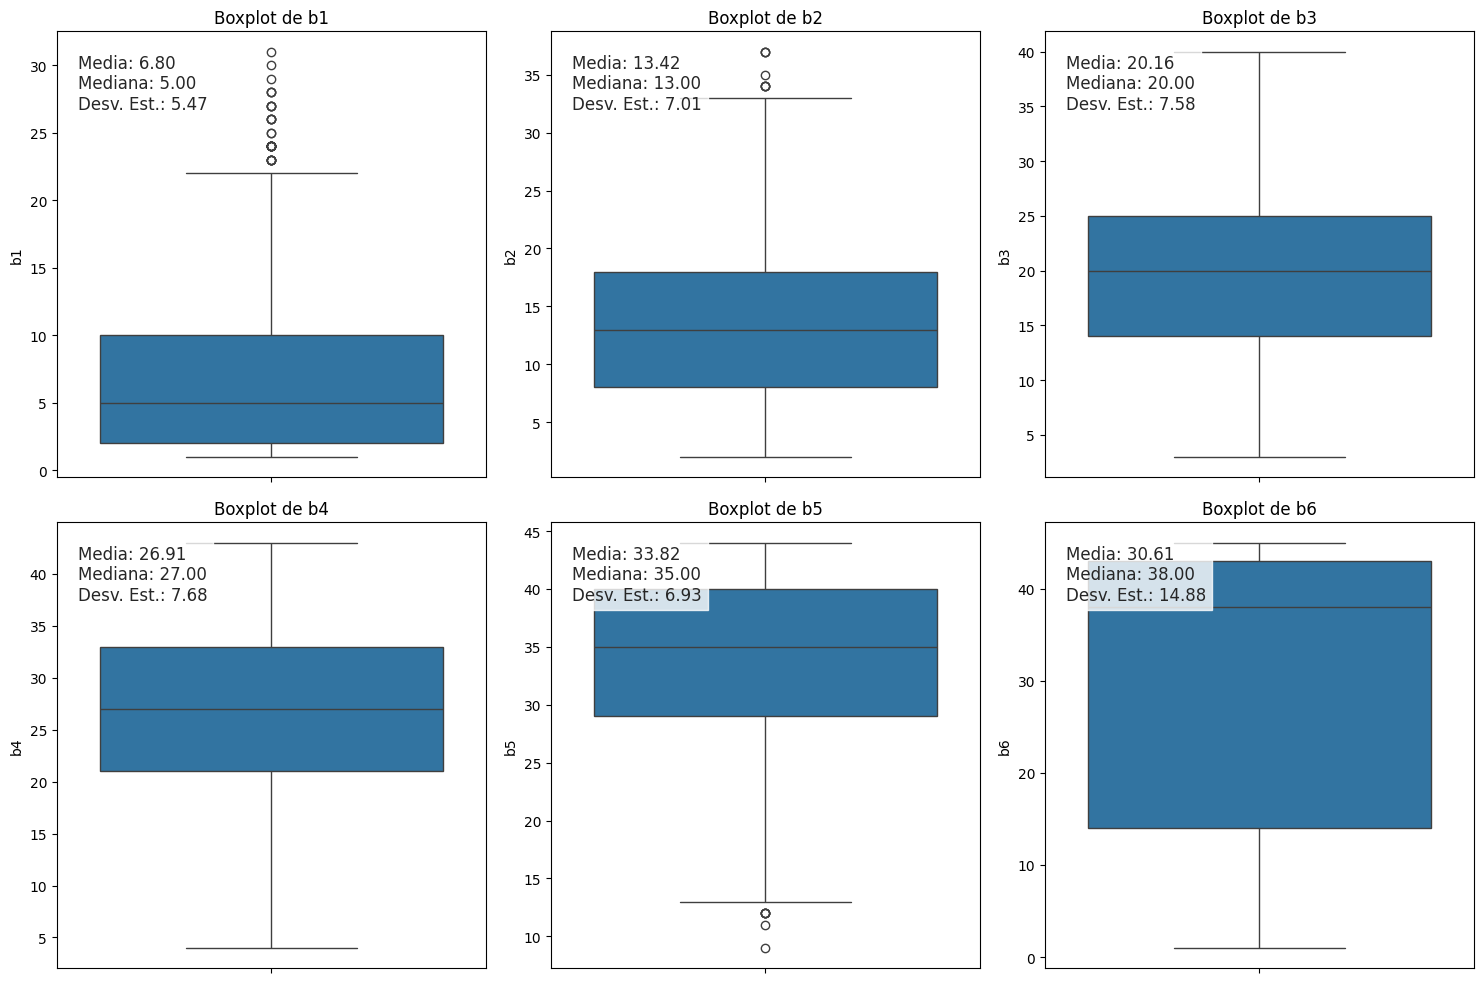

In [8]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas
axes = axes.flatten()  # Aplanar el array de axes

#from pypalettes import get_hex
sns.set_theme(style="darkgrid")
#palette = get_hex("Acadia", keep_first_n=3)

# Lista de columnas para los boxplots
columnas = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6']

# Iterar sobre las columnas y crear los boxplots
for i, columna in enumerate(columnas):
    sns.boxplot(y=df[columna], ax=axes[i])  # Cambiar a 'y' para boxplots verticales
    axes[i].set_title(f'Boxplot de {columna}')

    # Calcular y mostrar estadísticas
    stats = df[columna].describe()
    stats_str = f"Media: {stats['mean']:.2f}\nMediana: {stats['50%']:.2f}\nDesv. Est.: {stats['std']:.2f}"
    axes[i].text(0.05, 0.95, stats_str, transform=axes[i].transAxes,
                 verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

<Axes: xlabel='fecha', ylabel='b1'>

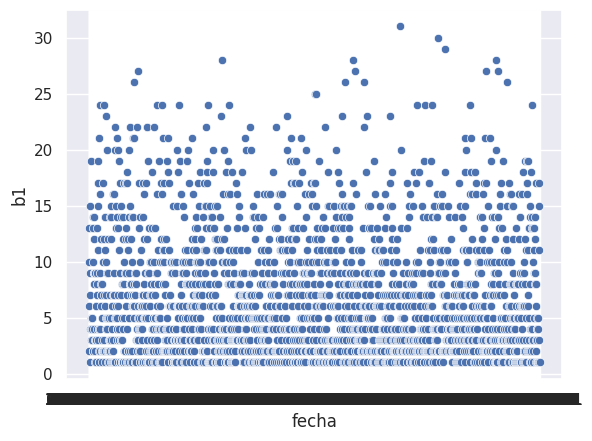

In [ ]:

sns.scatterplot(x=df['fecha'], y=df['b1'])

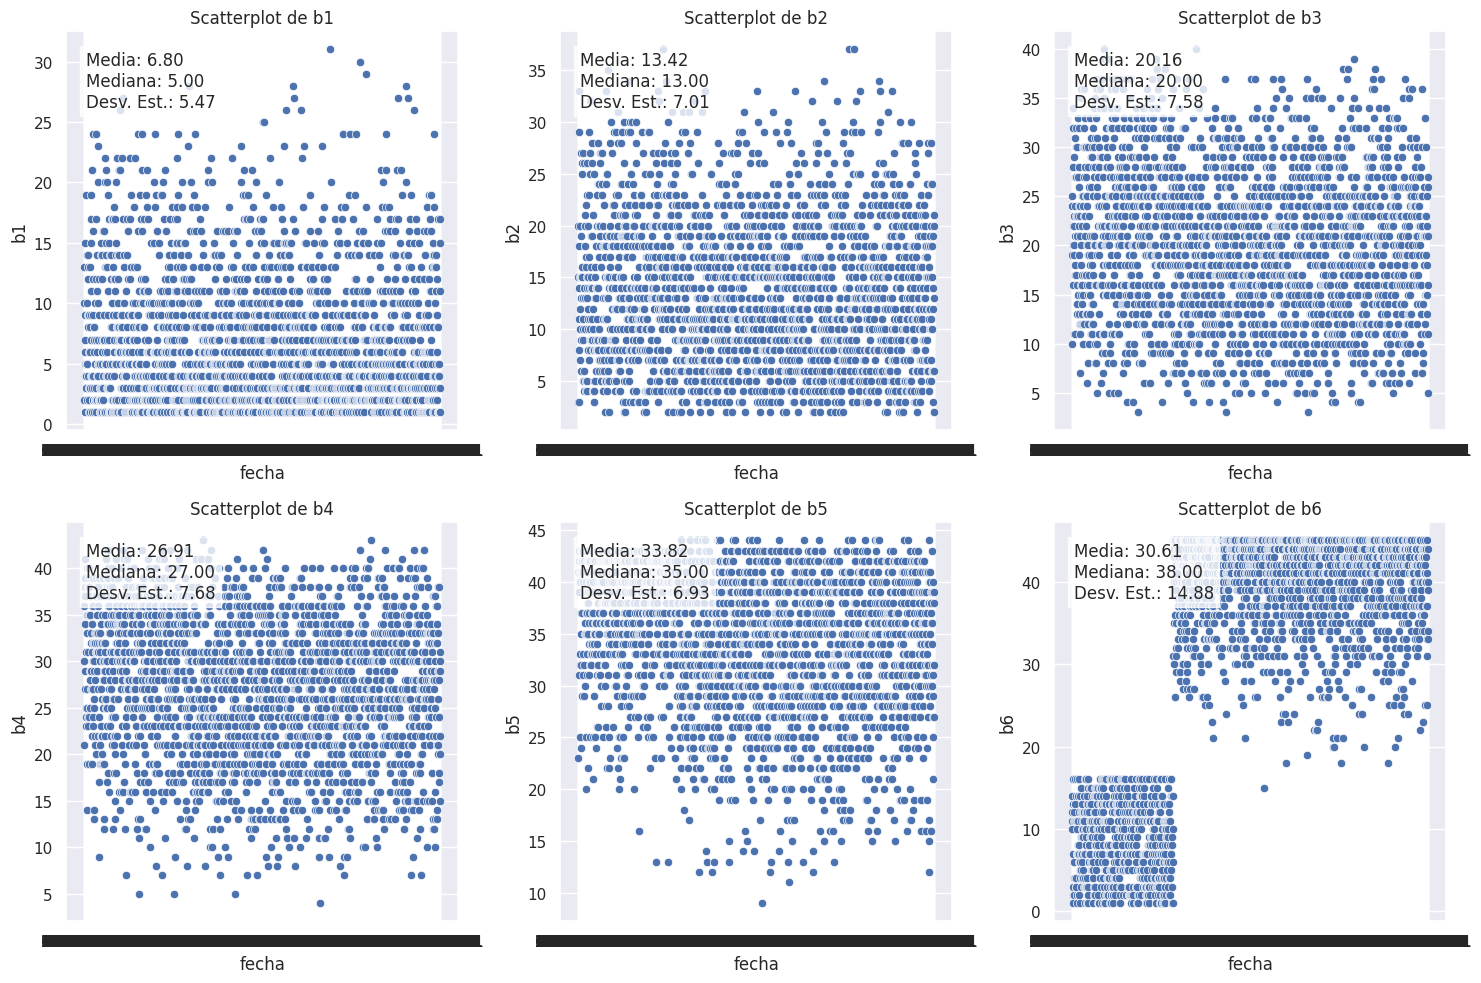

In [ ]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas
axes = axes.flatten()  # Aplanar el array de axes

# Lista de columnas para los scatterplots
columnas = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6']

# Iterar sobre las columnas y crear los scatterplots
for i, columna in enumerate(columnas):
    # sns.scatterplot(x=df.index, y=df[columna], ax=axes[i]) # Usar índice como eje x
    sns.scatterplot(x=df['fecha'], y=df[columna], ax=axes[i]) #Usar Fecha como eje X

    axes[i].set_title(f'Scatterplot de {columna}')


# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()